# E-Commerce Clothing Classifier Model with Keras

![Clothing Classifier Model](images/Clothing%20Classifier%20Model.png)

_Fashion Forward_ is a new AI-based e-commerce clothing retailer. They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a clothing classifier, your primary objective is to develop a deep learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [5]:
# Run the cells below first
from tensorflow.keras import layers, models, Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the MNIST datasets as NumPy arrays
train_images, train_labels, test_images, test_labels = (np.load('data/fashion_mnist.npz')[key] 
                                    for key in ['train_images', 'train_labels', 'test_images', 'test_labels'])

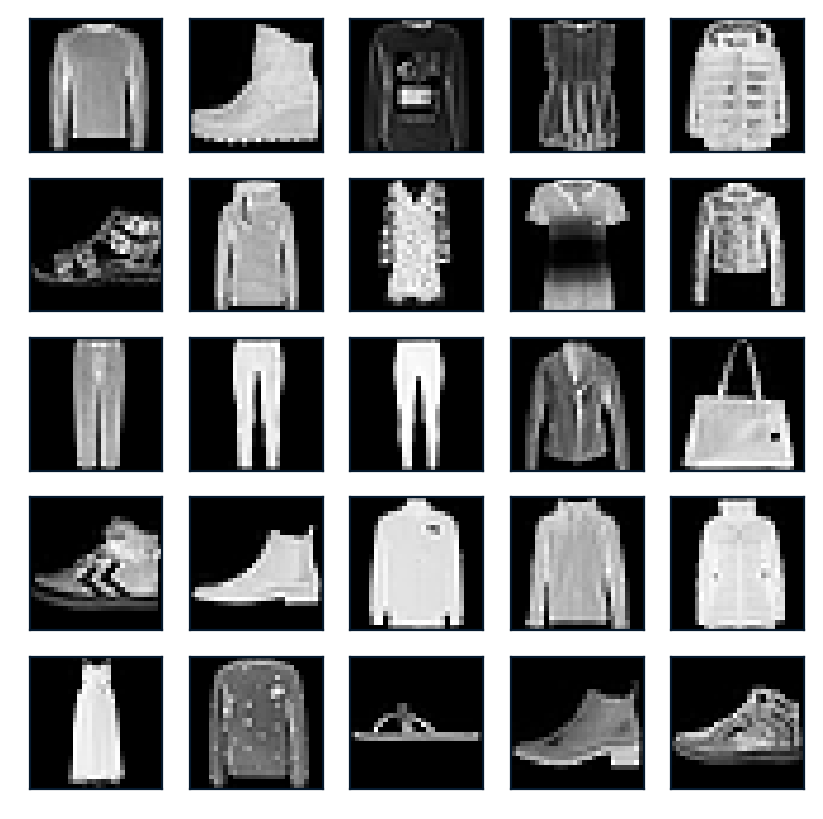

In [6]:
# Visualize a sample of images
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

In [7]:
# Start coding here
# Use as many cells as you need

from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

num_classes = len(set(train_labels))
img_size = train_images[0].shape[0]

# Convert the labels to 1-hot encoded form
# (You can skip this step if you use the sparse_categorical_crossentropy loss function)
train_labels_1h = to_categorical(train_labels)
test_labels_1h = to_categorical(test_labels)

# Define the model
model = Sequential()
# Add a convolutional layer with 32 filters of size 3x3 
model.add(Conv2D(32, kernel_size=3, input_shape=(img_size, img_size, 1), activation = 'relu'))
# Add a convolutional layer with 16 filters of size 3x3
model.add(Conv2D(16, kernel_size=3, activation='relu'))
# Flatten the previous layer output 
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Fit the model to the training data 
model.fit(train_images, train_labels_1h, 
          validation_split=0.2, 
          epochs=1, batch_size=100)

# Evaluate the model on the test data
scores = model.evaluate(test_images, test_labels_1h, batch_size=100)
test_accuracy = scores[-1]
print(f'Test accuracy: {test_accuracy:.2f}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                92170     
                                                                 
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________
50/50 [==============================] - 1s 18ms/step - loss: 0.4873 - accuracy: 0.8312
Test accuracy: 0.83
